In [1]:
# #Installing all required libraries
# # tensorflow and keras may not work with direct installation, then install them from the terminal and restart the kernel.
# %pip install yfinance
# %pip install seaborn
# %pip install pandas_datareader
# %pip install scikit-learn
# %pip install keras
# %pip install tensorflow
# %pip install setuptools
# %pip install pandas-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'TSLA']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
company_list = [AAPL, GOOG, MSFT, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-29,188.419998,198.869995,184.539993,194.050003,194.050003,243869700,TESLA
2024-04-30,186.979996,190.949997,182.839996,183.279999,183.279999,127031800,TESLA
2024-05-01,182.000000,185.860001,179.009995,179.990005,179.990005,92829700,TESLA
2024-05-02,182.860001,184.600006,176.020004,180.009995,180.009995,89148000,TESLA
2024-05-03,182.100006,184.779999,178.419998,181.190002,181.190002,75491500,TESLA
2024-05-06,183.800003,187.559998,182.199997,184.759995,184.759995,84390300,TESLA
2024-05-07,182.399994,183.259995,177.399994,177.809998,177.809998,75045900,TESLA
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500,TESLA
2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65950300,TESLA


In [5]:
# Summary Stats
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,221.557540,225.786230,217.321349,221.640754,221.640754,1.170105e+08
std,36.512356,36.927005,35.916808,36.458885,36.458885,2.754692e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,6.450660e+07
25%,186.057499,189.857502,182.799995,187.507500,187.507500,9.964370e+07
50%,229.955002,235.364998,225.959999,232.120003,232.120003,1.123512e+08
75%,251.562496,257.977501,247.324993,252.699993,252.699993,1.313453e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.438697e+08


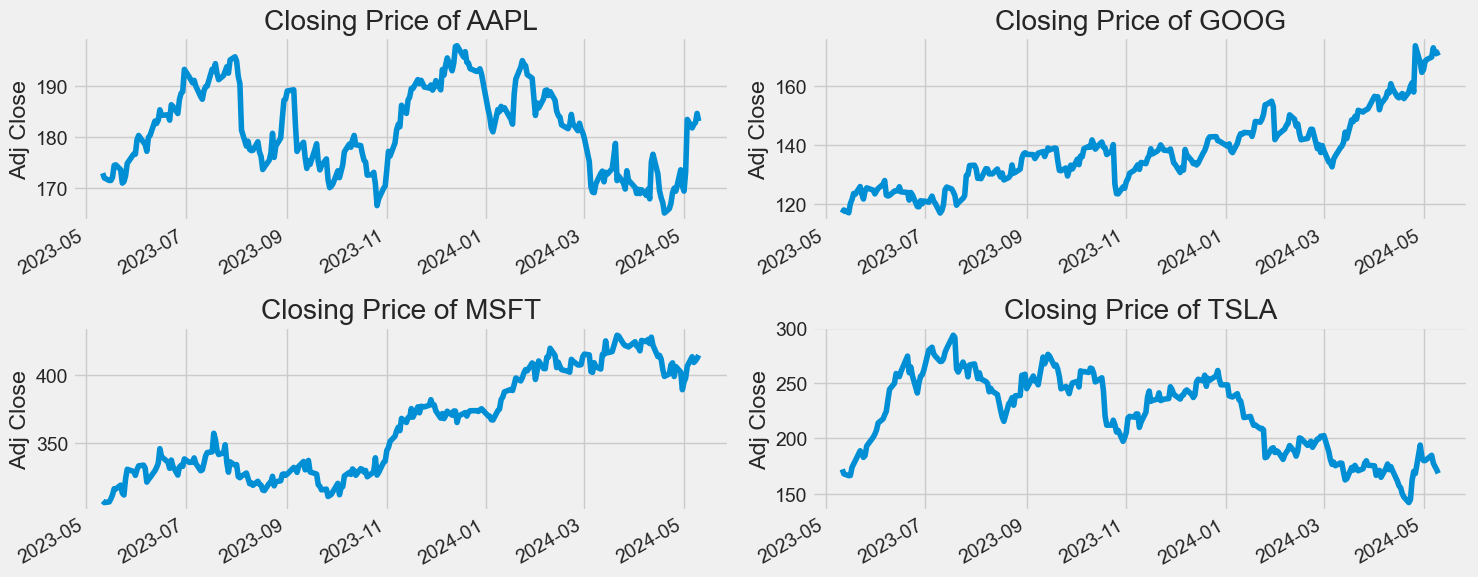

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

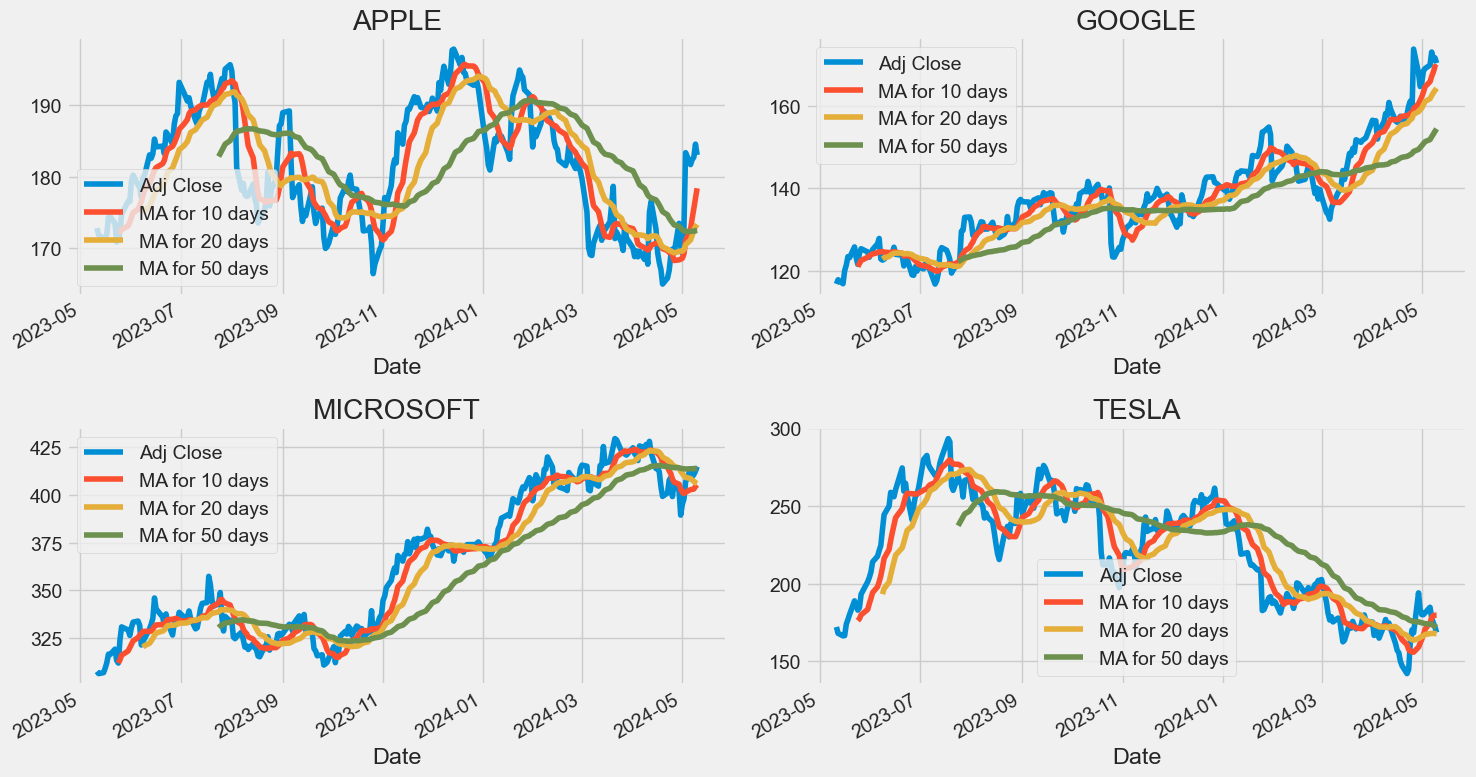

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()

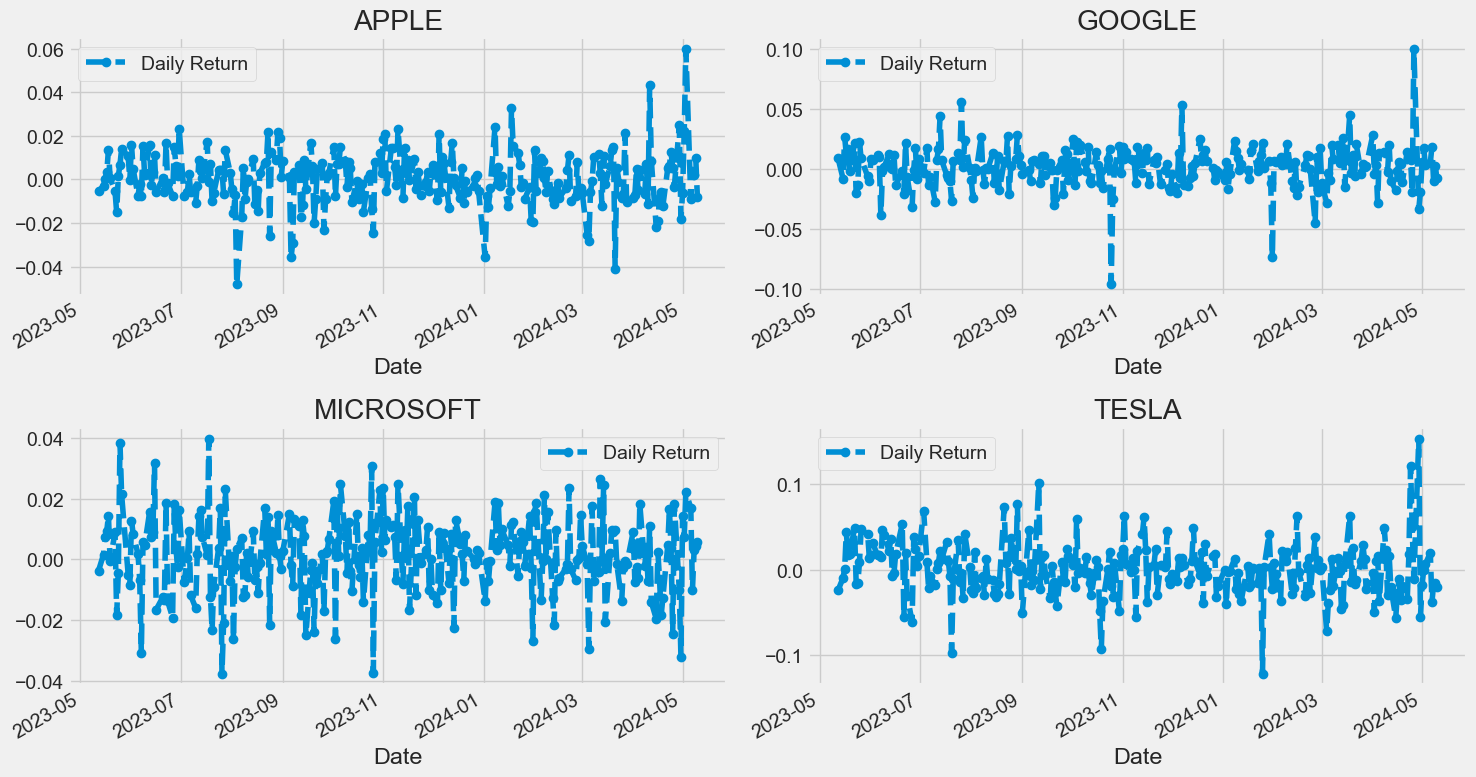

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

fig.tight_layout()

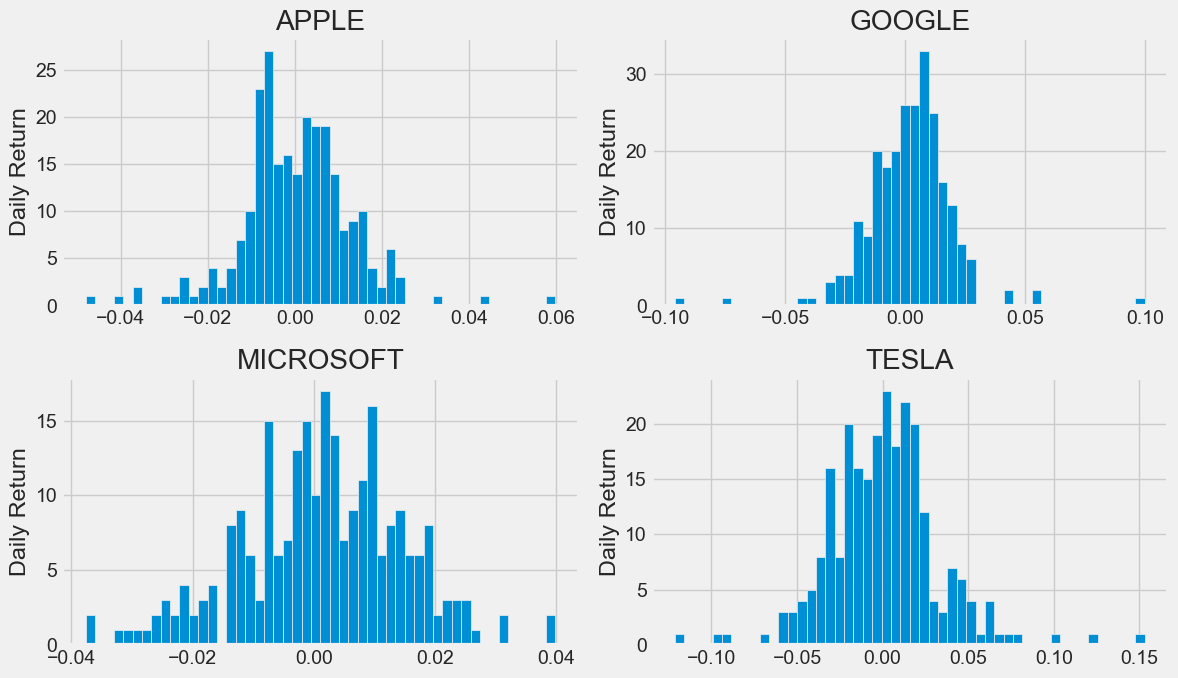

In [10]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
# Fetch historical data using yfinance
data = yf.download(tech_list, start=start, end=end)['Adj Close']

# Create DataFrame
closing_df = pd.DataFrame(data)

# Let's take a quick look
closing_df.head() 

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,GOOG,MSFT,TSLA
Date,,,,
2023-05-11,172.827499,116.900002,307.585541,172.080002
2023-05-12,171.891205,117.919998,306.454834,167.979996
2023-05-15,171.393173,116.959999,306.940826,166.350006
2023-05-16,171.393173,120.089996,309.202301,166.520004
2023-05-17,172.010727,121.480003,312.124725,173.860001


In [12]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,GOOG,MSFT,TSLA
Date,,,,
2023-05-11,NaN,NaN,NaN,NaN
2023-05-12,-0.005418,0.008725,-0.003676,-0.023826
2023-05-15,-0.002897,-0.008141,0.001586,-0.009703
2023-05-16,0.000000,0.026761,0.007368,0.001022
2023-05-17,0.003603,0.011575,0.009451,0.044079


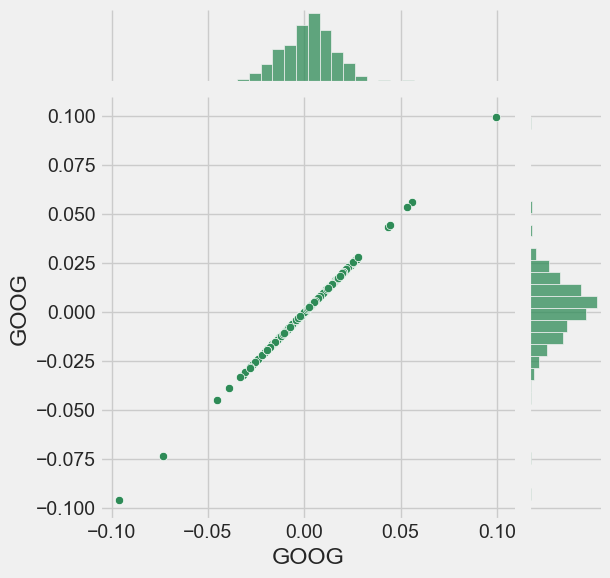

In [13]:

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

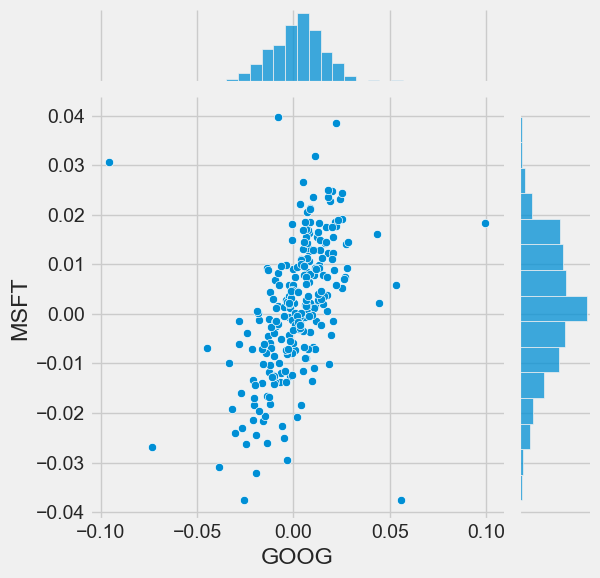

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

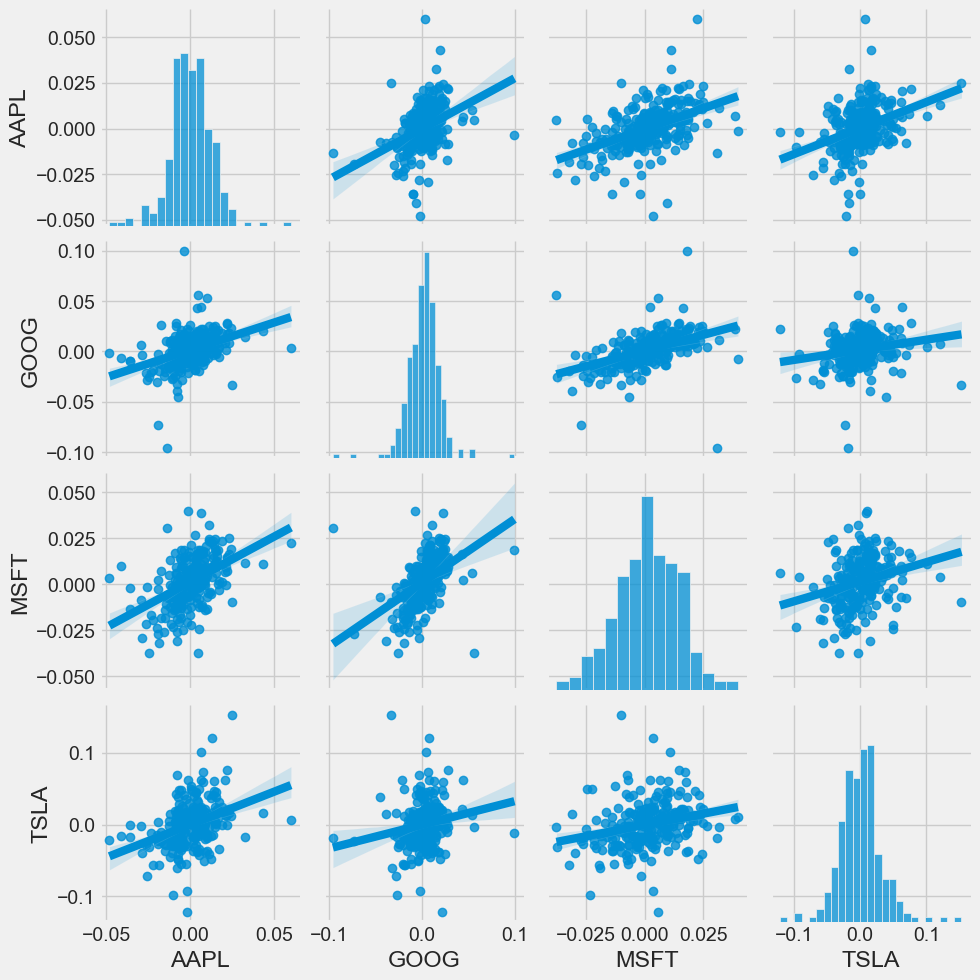

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

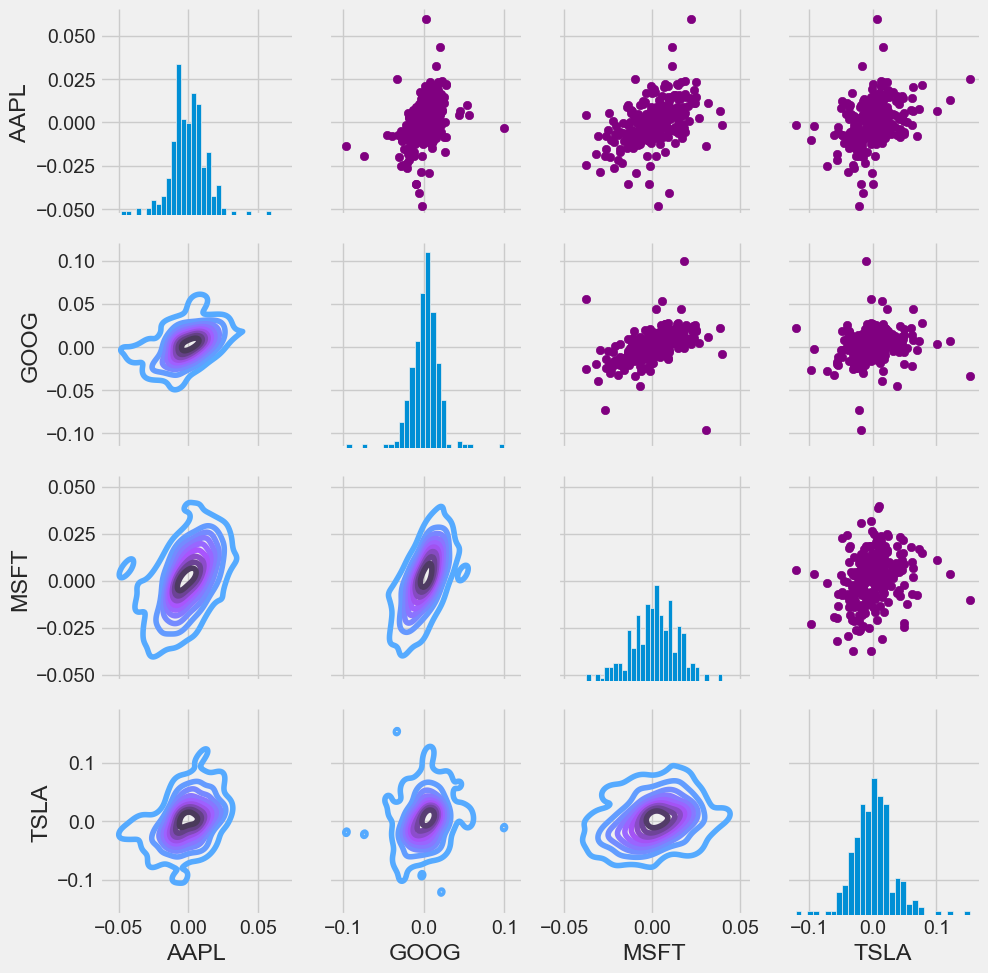

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

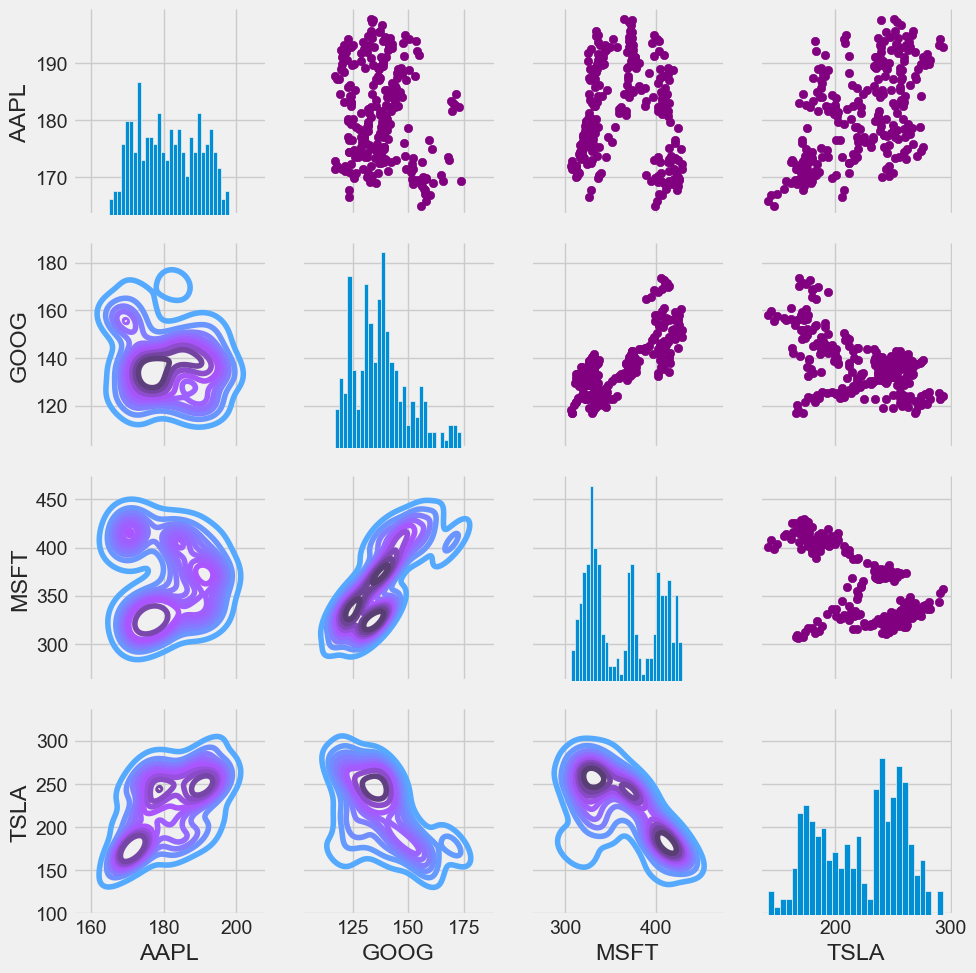

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

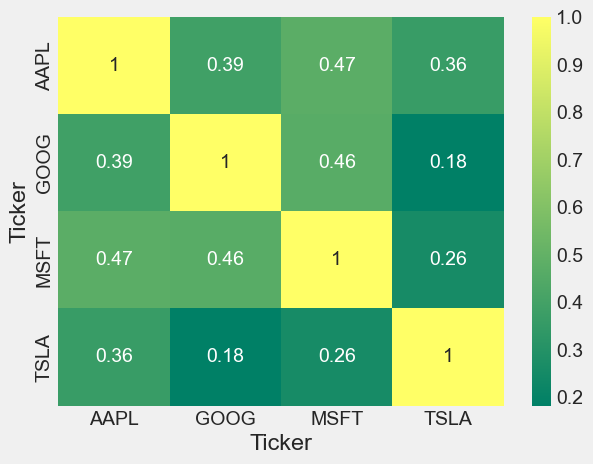

In [18]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<Axes: xlabel='Ticker', ylabel='Ticker'>

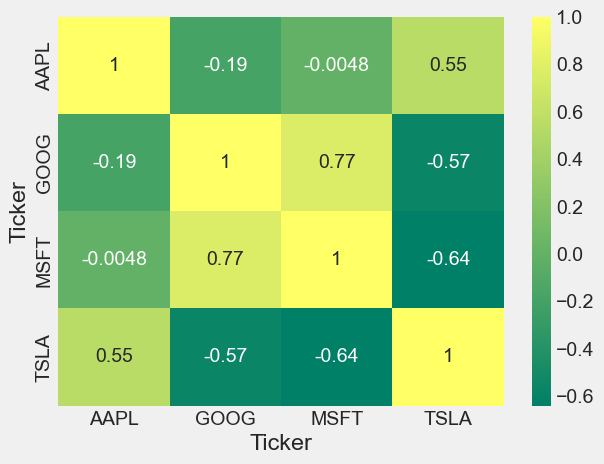

In [19]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [20]:
# Get the stock quote
# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df = yf.download('TSLA', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2024-05-06,183.800003,187.559998,182.199997,184.759995,184.759995,84390300
2024-05-07,182.399994,183.259995,177.399994,177.809998,177.809998,75045900
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500


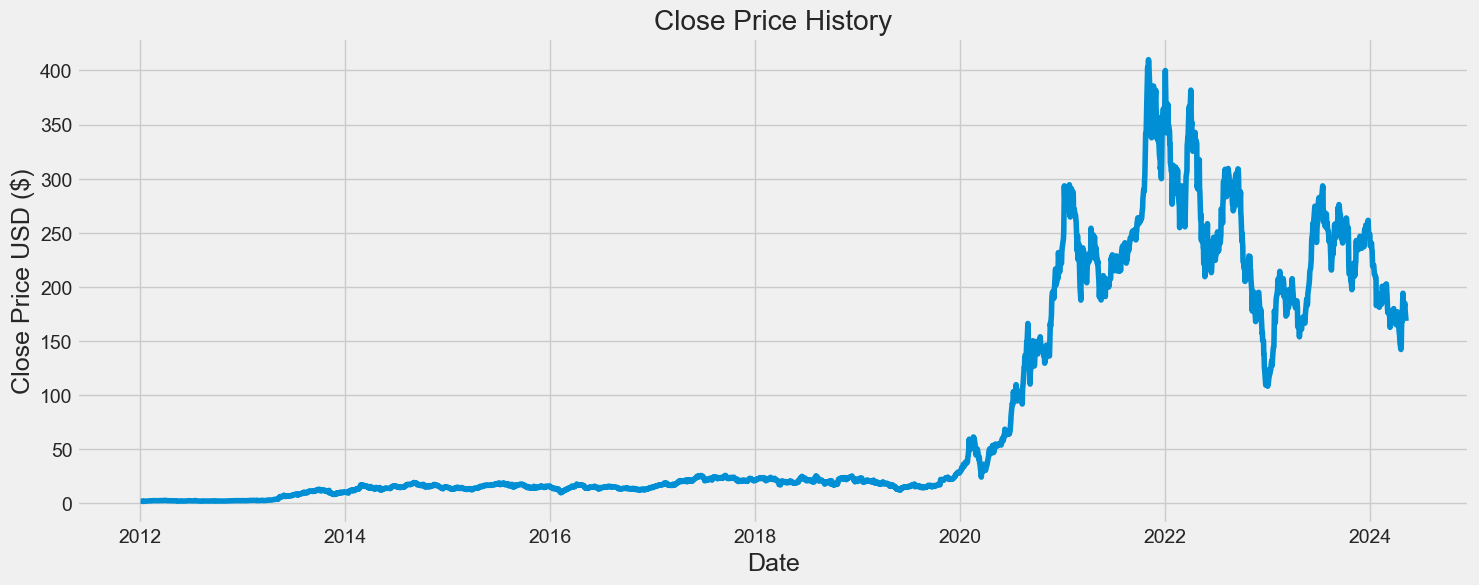

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2954

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.42404305],
       [0.41731029],
       [0.40874133]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [25]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the input data shape
input_shape = (10, 1)  # assuming 10 timesteps and 1 feature

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\91823\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2894/2894 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - loss: 0.0018


In [26]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]  # Using original values for evaluation

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("Root Mean Squared Error:", rmse)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Root Mean Squared Error: 11.977491066247024


C:\Users\91823\AppData\Local\Temp\ipykernel_26392\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


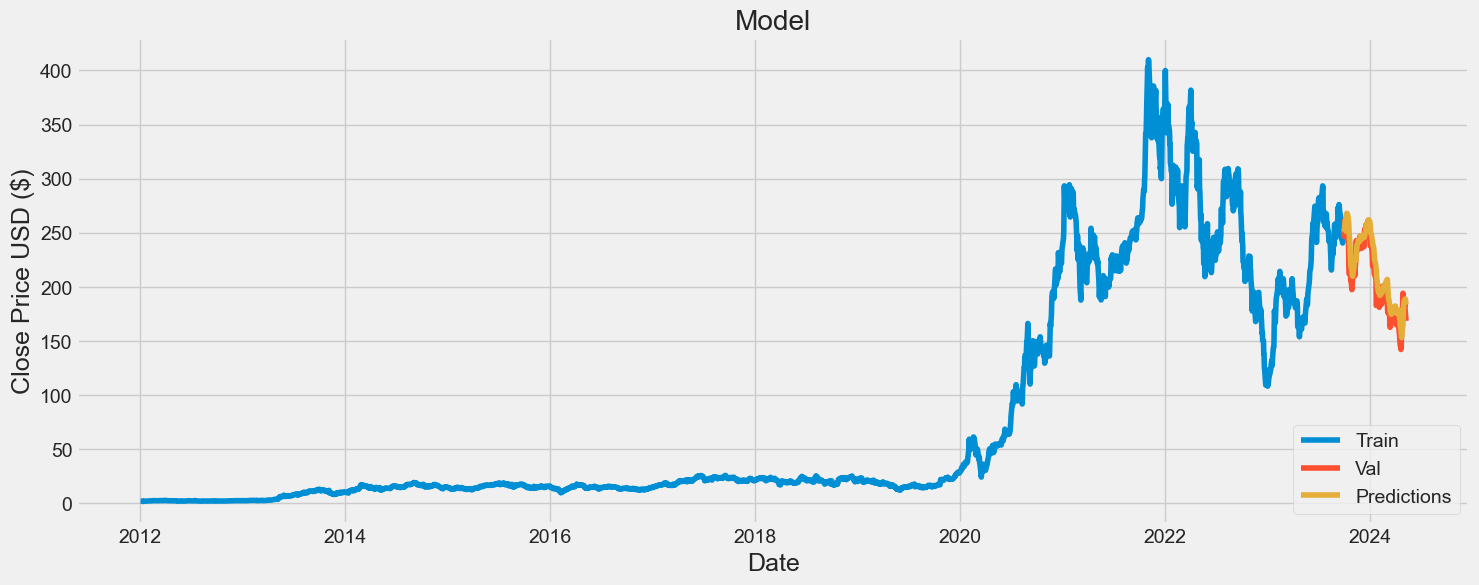

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-29,250.220001,250.423676
2023-10-02,251.600006,251.152802
2023-10-03,246.529999,252.874908
2023-10-04,261.160004,253.548141
2023-10-05,260.049988,257.013062
...,...,...
2024-05-06,184.759995,187.757416
2024-05-07,177.809998,188.701126
2024-05-08,174.720001,187.949799
